# Stroke Prediction: Classification

## Data Dictionary:
1. id: unique identifier (int)
2. gender: "Male", "Female" or "Other" (object)
3. age: age of the patient (int)
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension (int)
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease (int)
6. ever_married: "No" or "Yes" (object)
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (object)
8. Residence_type: "Rural" or "Urban" (object)
9. avg_glucose_level: average glucose level in blood (int)
10. bmi: body mass index (int)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (object)
12. stroke: 1 if the patient had a stroke or 0 if not (int)

## Import Libraries

In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from ipywidgets import interactive

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, precision_score,
                             PrecisionRecallDisplay, recall_score, RocCurveDisplay, f1_score,
                            accuracy_score, classification_report)

sns.set(style="darkgrid")

# Functions

In [2]:
# Function for plotting boxplots and histograms
def plot_num(col):
    # Subplots
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6))
    
    # Boxplot
    sns.boxplot(df[col], ax=ax_box, orient='h')

    # Histogram
    sns.histplot(data=df, x=col, ax=ax_hist)

## Load Data Set

In [3]:
# Load Data
df = pd.read_csv("C:\\Users\\hamma\\Coding Dojo\\00 Data Sets\\healthcare-dataset-stroke-data (2).csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Make all column titles lower case
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.shape

(5110, 12)

> There are 5110 rows and 12 columns

## Data Cleaning

In [6]:
# Inspect Data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Delete Unnecessary Columns
df.drop(columns='id',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


> The 'id' column was removed since it was a unique identifier to each row.

In [8]:
# Check for Duplicated Rows
df.duplicated().sum()

0

> There are no duplicated rows to be dealt with.

In [9]:
# Find Missing Values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
total_bmi_count = df['bmi'].value_counts().sum()
missing_bmi_count = df['bmi'].isna().sum()

print(total_bmi_count)
missing_bmi_count

4909


201

In [11]:
# Percent of missing bmi values
missing_bmi_count / total_bmi_count

0.040945202688938684

> 4.1% of the bmi column is missing. Since this is a low percentage these values will be dropped

In [12]:
# Drop missing values in 'bmi' column
df.dropna(subset='bmi', inplace=True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# Checking the Data Types Compared to Data Dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


> All data types match the data dictionary.

In [14]:
# Identify Inconsistencies in Categorical Values
for i in df.select_dtypes(include='object'):
  count = df[i].value_counts()
  print(count)

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Yes    3204
No     1705
Name: ever_married, dtype: int64
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Urban    2490
Rural    2419
Name: residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


In [15]:
# Remove row with the value other since there is only 1
df = df.loc[df['gender']!= 'Other']
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [16]:
# Make'gender' column binary and change name to is_male
df['gender'].replace({'Male':1,'Female':0}, inplace=True)
df.rename(columns={'gender':'is_male'}, inplace=True)
df.head()

,is_male,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [17]:
df['work_type'].replace('children', 'Children', inplace=True)
df['work_type'].value_counts()

Private          2810
Self-employed     775
Children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [18]:
df['smoking_status'].replace({'never smoked': 'Never Smoked', 'formerly smoked': 'Formerly Smoked', 'smokes': 'Smokes'}, inplace=True)
df['smoking_status'].value_counts()

Never Smoked       1852
Unknown            1483
Formerly Smoked     836
Smokes              737
Name: smoking_status, dtype: int64

In [19]:
# Make 'ever_married' column binary
df['ever_married'].replace({'Yes':1,'No':0}, inplace=True)
df['ever_married'].value_counts()

1    3204
0    1704
Name: ever_married, dtype: int64

In [20]:
# Make 'residence_type' column binary and change column name to 'is_urban'
df['residence_type'].replace({'Rural':0,'Urban':1}, inplace=True)
df.rename(columns={'residence_type':'is_urban'}, inplace=True)
df.head()

,is_male,age,hypertension,heart_disease,ever_married,work_type,is_urban,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,Formerly Smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,Never Smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,Smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,Never Smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,Formerly Smoked,1


In [21]:
# Inspect Data for Impossible Values
df.describe()

,is_male,age,hypertension,heart_disease,ever_married,is_urban,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,0.409739,42.868810,0.091891,0.049511,0.652812,0.507335,105.297402,28.89456,0.042584
std,0.491836,22.556128,0.288901,0.216954,0.476125,0.499997,44.425550,7.85432,0.201937
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,91.680000,28.10000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,113.495000,33.10000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.60000,1.000000


> Although not impossible a min value of 10.3 and max value of 97.6 for BMI are unlikely. This will be  further explored in EDA

In [22]:
# Inspect categorical statistics
df.describe(exclude='number')

,work_type,smoking_status
count,4908,4908
unique,5,4
top,Private,Never Smoked
freq,2810,1852


## Exploratory Data Analysis

## Which features are correlated with the target (Stroke)?

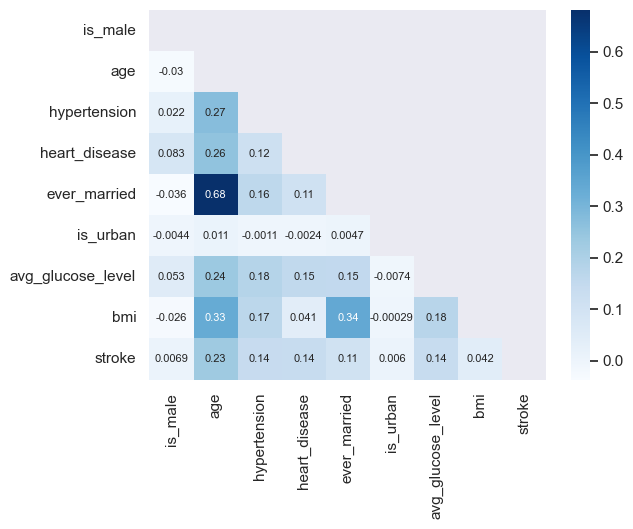

In [42]:
# Create correlation heatmap
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={'size':8}, mask=mask)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

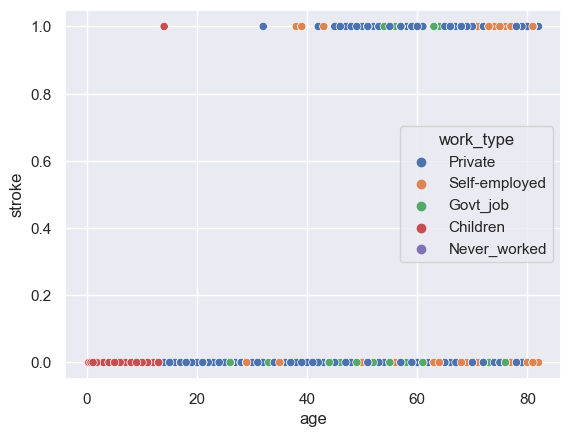

In [47]:
sns.scatterplot(data=df, x='age', y='stroke', hue='work_type');

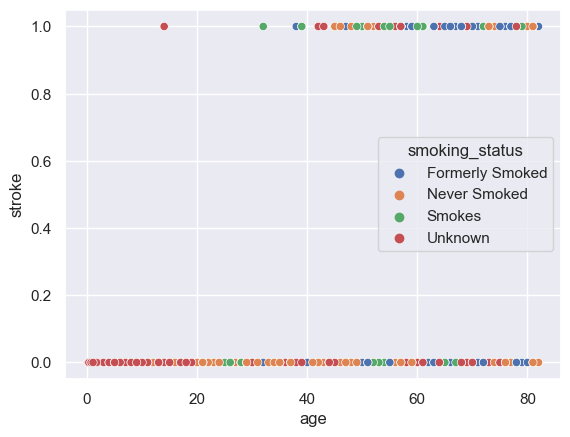

In [48]:
sns.scatterplot(data=df, x='age', y='stroke', hue='smoking_status');

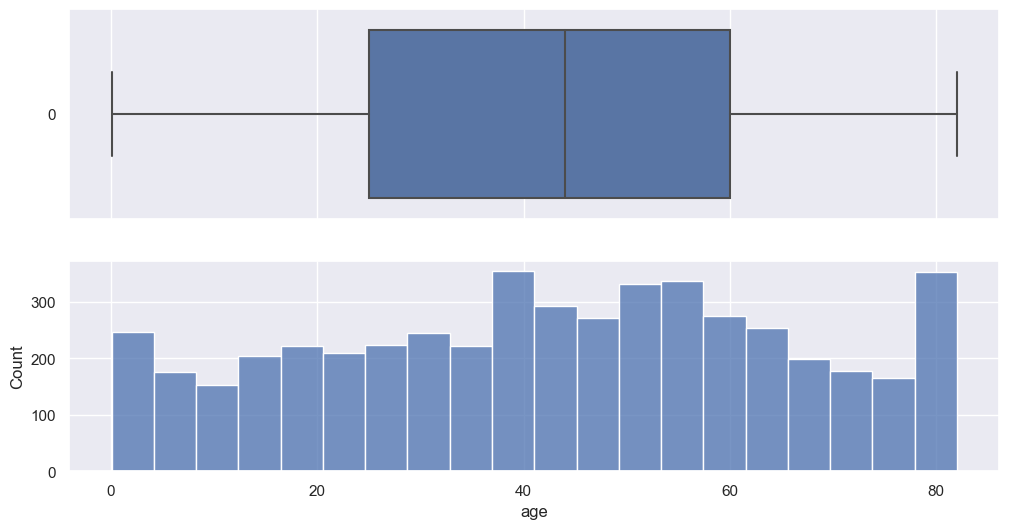

In [49]:
plot_num('age')

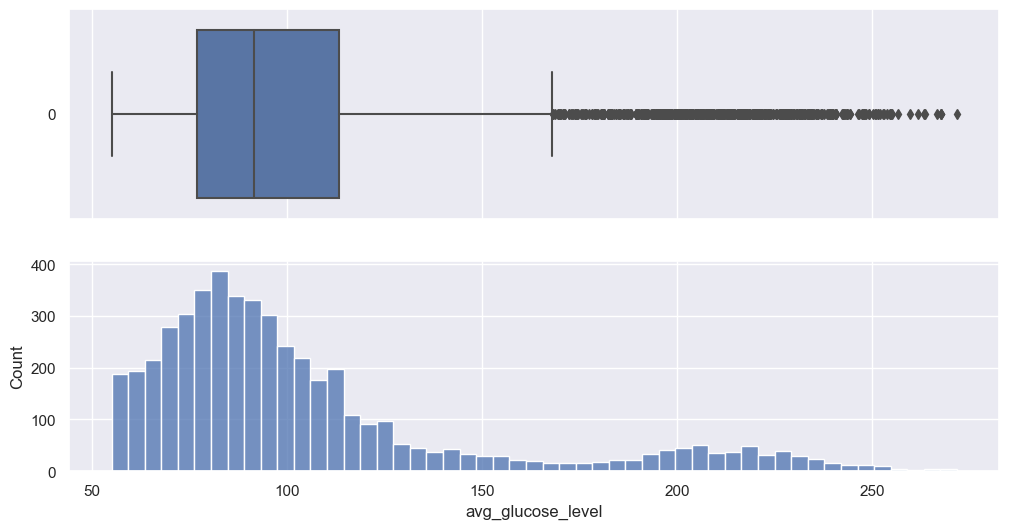

In [50]:
plot_num('avg_glucose_level')

<AxesSubplot: xlabel='avg_glucose_level', ylabel='Count'>

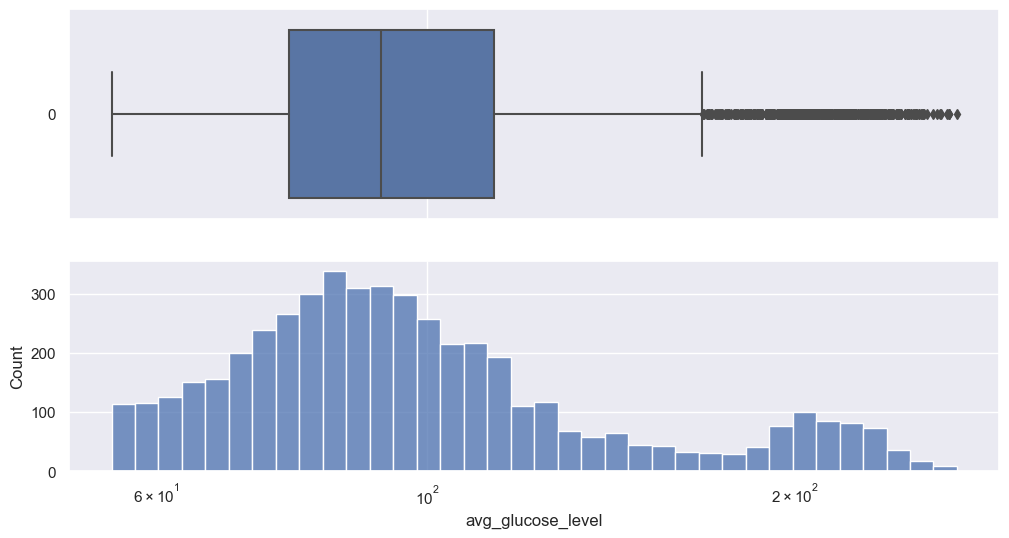

In [66]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6))
    
# Boxplot
sns.boxplot(df['avg_glucose_level'], ax=ax_box, orient='h')
plt.xscale('log')

# Histogram
sns.histplot(data=df, x='avg_glucose_level', ax=ax_hist)

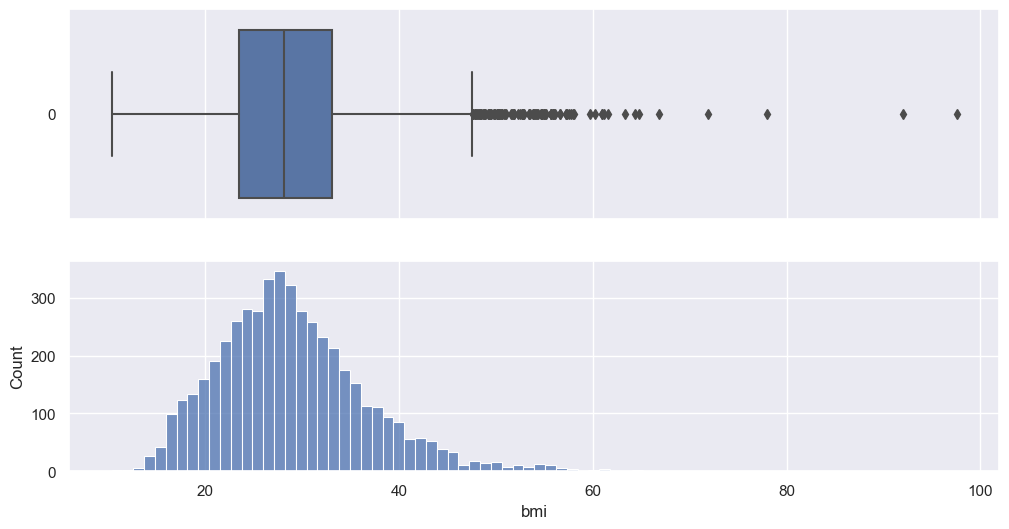

In [51]:
plot_num('bmi')

<AxesSubplot: xlabel='bmi', ylabel='Count'>

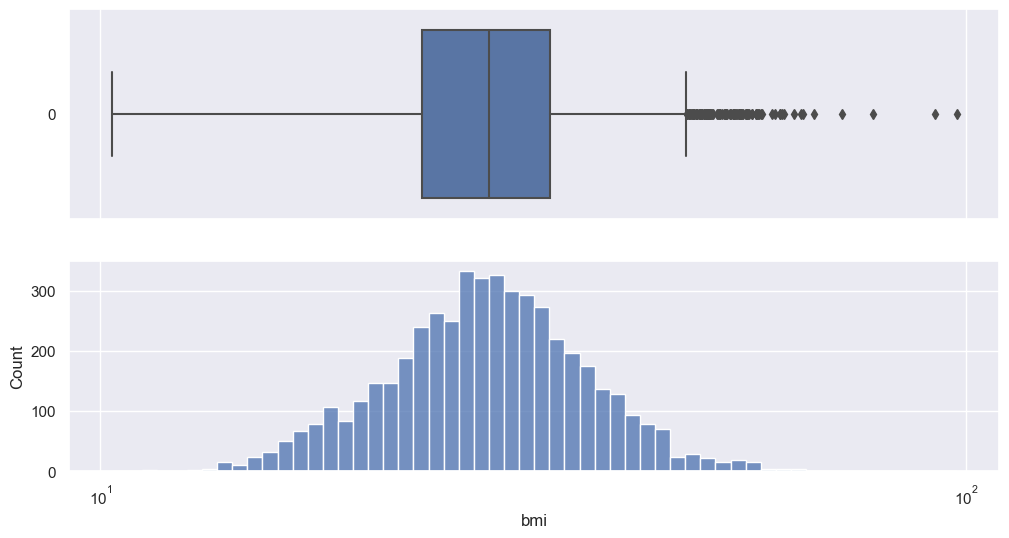

In [65]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6))
    
# Boxplot
sns.boxplot(df['bmi'], ax=ax_box, orient='h')
plt.xscale('log')

# Histogram
sns.histplot(data=df, x='bmi', ax=ax_hist)

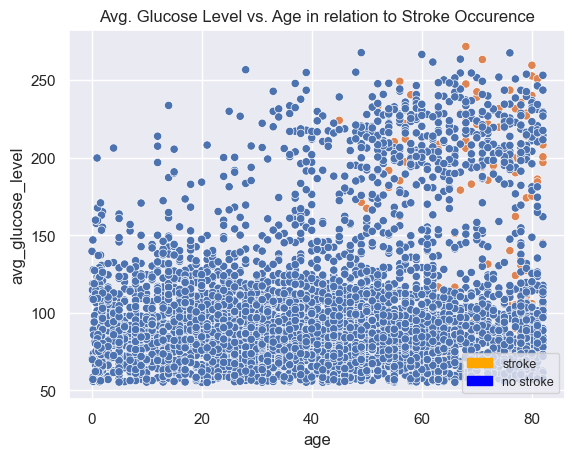

In [53]:
# scatter plot of glucose levels vs age with the relation to stroke
orange_label = mpatches.Patch(color='orange', label='stroke')
blue_label = mpatches.Patch(color='blue', label='no stroke')


sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='lower right');
plt.title('Avg. Glucose Level vs. Age in relation to Stroke Occurence');

In [ ]:
def plot_cat(x, y):
    sns.barplot(x=df[x], y=df[y], data=df, hue='stroke');

In [ ]:
plot_cat('gender', 'avg_glucose_level')

In [ ]:
plot_cat('gender', 'age')

## Preprocessing for Machine Learning (No Feature Engineering)

In [ ]:
# Inspect data
df_ml.info()

In [ ]:
# Remove duplicates
df_ml.duplicated().sum()

In [ ]:
# Remove 'id' column
df_ml.drop('id', axis=1, inplace=True)
df_ml.info()

In [ ]:
df_ml.isna().sum()

In [ ]:
# Determine class balance
df['stroke'].value_counts(normalize=True)

In [ ]:
# Instantiate smote variable for class balance
smote = SMOTE()

# Instantiate scaler
scaler = StandardScaler()

# Insatiate one hot encoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

# Imputer
mean_imp = SimpleImputer(strategy = 'mean')

# Column selectors
cat_col = make_column_selector(dtype_include = 'object')
num_col = make_column_selector(dtype_include = 'number')

In [ ]:
# Model validation
# Features matrix and target
X = df_ml.drop('stroke', axis=1)
y = df_ml['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print(X.head())
y.head()

In [ ]:
# Instantiate pipelines
num_pipe = make_pipeline(mean_imp, scaler)
num_pipe

In [ ]:
# Preprocessor
# Tuples for columntransformer
num_tuple = (num_pipe, num_col)
cat_tuple = (ohe, cat_col)

# Columntransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

## Default Logistic Regression Model

In [ ]:
# Instance of model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate pipeline
lr_pipe = make_pipeline(preprocessor, smote, log_reg)
lr_pipe

# Fit on training data
lr_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
# Default Model Metrics
# Confusion Matrix
labels = ['No Stroke', 'Stroke']
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_preds, cmap='Greens', 
                                        normalize='true', display_labels=labels).ax_.set_title('Default Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_test_preds, target_names=labels))

## Default Random Forest Model

In [ ]:
# Default Random Forest Model
# Instance of model
rf = RandomForestClassifier()

# Pipeline
rf_pipe = make_pipeline(preprocessor, smote, rf)

# Fit on Train
rf_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

In [ ]:
# Default Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds, cmap='Greens', normalize='true', display_labels=labels).ax_.set_title('Default RF Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rf_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, rf_test_preds, target_names=labels))

## Default K-Nearest Neighbor Model

In [ ]:
# Default KNN Model
# Instance of model
knn = KNeighborsClassifier()

# Pipeline
knn_pipe = make_pipeline(preprocessor, smote, knn)

# Fit on Train
knn_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [ ]:
# KNN Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds, cmap='Greens', normalize='true', display_labels=labels).ax_.set_title('KNN Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_preds, target_names=labels))

## Tuned Logistic Regression Model

In [ ]:
# Tuning Random Forest Model with GridSearchCV
# Looking a Parameters
lr_pipe.get_params()

In [ ]:
# Parameter Grid
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__max_iter': [100, 1000, 2000],
              'logisticregression__penalty': ['l2', 'l1'],
              'logisticregression__solver': ['liblinear']}

In [ ]:
lr_gridscv = GridSearchCV(lr_pipe, param_grid)

# Fit on Train
lr_gridscv.fit(X_train, y_train)

In [ ]:
# Display best parameters for tuned model
print('Best Logistic Regression Parameters:')
print(lr_gridscv.best_params_)
lr_best_pipe = lr_gridscv.best_estimator_
print(f'Accuracy of the Best Logistic Regression Model: {lr_best_pipe.score(X_test, y_test)}')

In [ ]:
# Save Predictions
lr_best_pipe_train_preds = lr_best_pipe.predict(X_train)
lr_best_pipe_test_preds = lr_best_pipe.predict(X_test)

In [ ]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_best_pipe_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_best_pipe_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_best_pipe_test_preds, target_names=labels))

## Feature Engineering For Machine Learning

In [ ]:
# Use 'bmi' column to create a new categorical column
# bmi < 18.5 = underweight
# bmi >= 18.5 | < 24.9 = normal weight
# bmi >= 25 | < 29.9 = overweight
# bmi >= 30 | < 34.9 = class 1 obesity
# bmi >= 35 | < 39.9 = class 2 obesity
# bmi >= 40 = class 3 obesity
df_ml['weight_status'] = df_ml['bmi'].apply(lambda x: 'underweight' if x < 18.5 else
                            'normal weight' if x >= 18.5 and x < 24.9 else
                            'overweight' if x >= 25 and x < 29.9 else 
                            'class 1 obesity' if x >= 30 and x < 34.9 else
                            'class 2 obesity' if x >= 35 and x < 39.9 else
                            'class 3 obesity')
df_ml['weight_status'].value_counts()

In [ ]:
# Drop 'bmi' column
df_ml.drop(columns='bmi', inplace=True)
df_ml.info()

In [ ]:
# Use 'age' column to create a new categorical column
df_ml['age_status'] = df_ml['age'].apply(lambda x: 'infant' if x <= 1 else 'child' if x > 1
                           and x <= 12 else 'adolescent' if x > 12 and x <= 17
                           else 'adult' if x > 17 and x < 65 else 'senior')
df_ml['age_status'].value_counts()

In [ ]:
# Drop 'age' column
df_ml.drop(columns='age', inplace=True)
df_ml.head()

## Tuned Model with Feature Engineering

In [ ]:
# Model validation
# Features matrix and target
X = df_ml.drop('stroke', axis=1)
y = df_ml['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Instantiate pipelines
num_pipe = make_pipeline(scaler)
num_pipe

In [ ]:
# Preprocessor
# Tuples for columntransformer
num_tuple = (num_pipe, num_col)
cat_tuple = (ohe, cat_col)

# Columntransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

In [ ]:
# Default Random Forest Model
# Instance of model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Pipeline
lr_pipe = make_pipeline(preprocessor, smote, lr)

# Fit on Train
lr_pipe.fit(X_train, y_train)

In [ ]:
# Save Predictions
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
# Default Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression with Feature Engineering Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_test_preds, target_names=labels))

In [ ]:
# Tuning Random Forest Model with GridSearchCV
# Looking a Parameters
lr_pipe.get_params()

In [ ]:
# Parameter Grid
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__max_iter': [3000, 4000, 5000],
              'logisticregression__penalty': ['none'],
              'logisticregression__solver': ['lbfgs']}

In [ ]:
lr_gridscv = GridSearchCV(lr_pipe, param_grid)

# Fit on Train
lr_gridscv.fit(X_train, y_train)

In [ ]:
# Display best parameters for tuned model
print('Best Logistic Regression Parameters:')
print(lr_gridscv.best_params_)
best_pipe = lr_gridscv.best_estimator_
print(f'Accuracy of the Best Logistic Regression Model: {best_pipe.score(X_test, y_test)}')

In [ ]:
# Save Predictions
best_pipe_train_preds = best_pipe.predict(X_train)
best_pipe_test_preds = best_pipe.predict(X_test)

In [ ]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, best_pipe_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, best_pipe_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, best_pipe_test_preds, target_names=labels))

## Recommendations

1. Model Recommendation
    - The model I recommend is the default logistic regression model. 